# EDA With Python and Logistic regression


We are using Titanic dataset from kaggle. Where we need to find the Survivors in titanic with semi cleaned dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
train = pd.read_csv("titanic_train.csv")

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

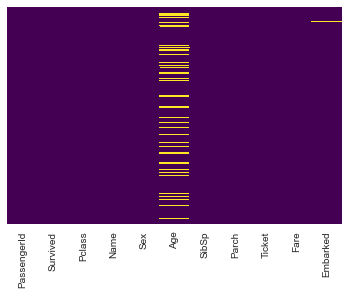

In [76]:
sns.heatmap(train.isnull(),yticklabels= False,cbar =False,cmap = "viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

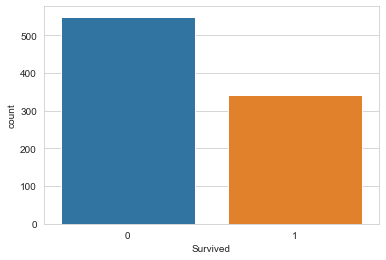

In [77]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived" ,data =  train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

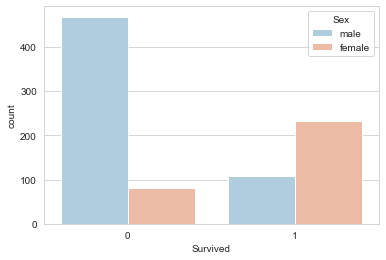

In [78]:
sns.countplot(x="Survived", hue="Sex",data=train,palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

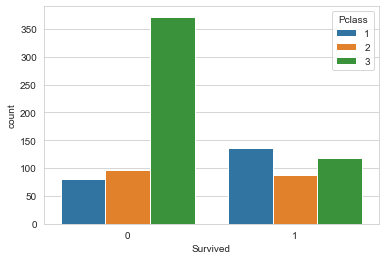

In [79]:
sns.countplot(x="Survived", hue="Pclass",data=train)

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

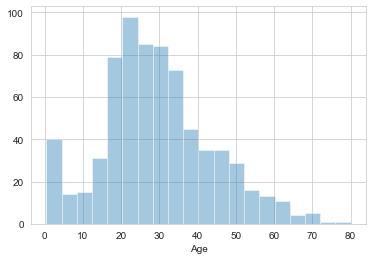

In [80]:
sns.distplot(train["Age"].dropna(),kde=False,bins = 20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

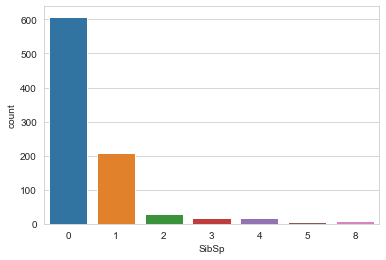

In [81]:
sns.countplot(x="SibSp",data = train)

<AxesSubplot:>

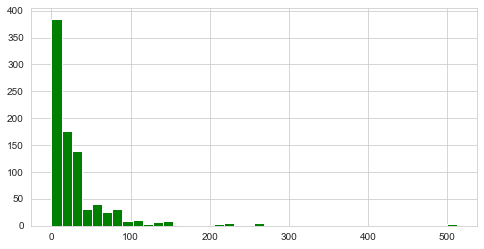

In [82]:
train["Fare"].hist(color="green",bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

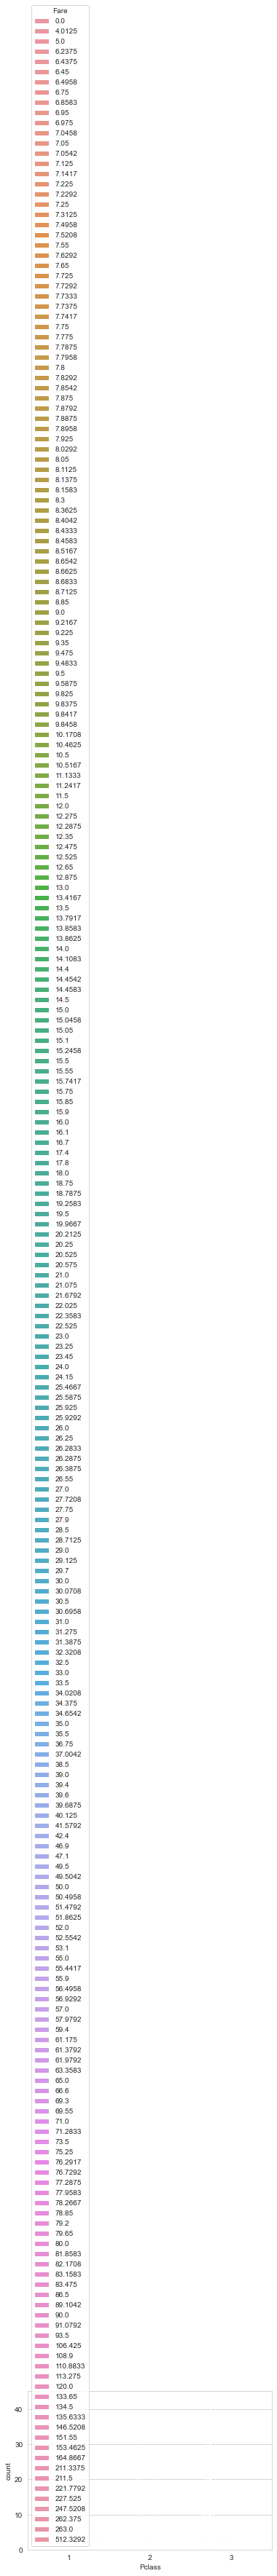

In [83]:
sns.countplot(x="Pclass",hue="Fare",data = train)

# Data Cleaning

replace missing data from age coloumn

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

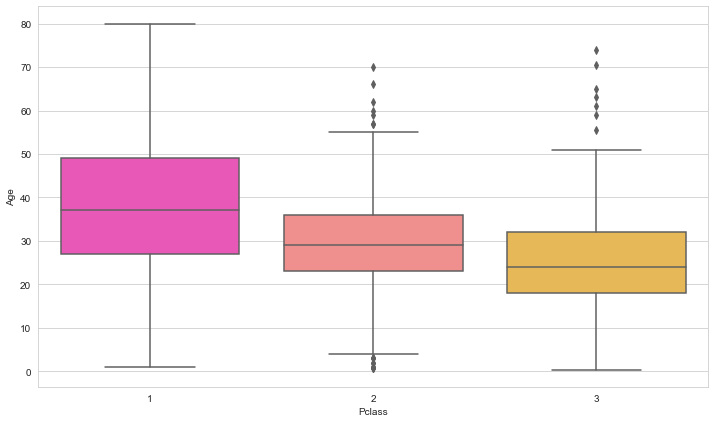

In [84]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y = "Age",data=train,palette="spring")

In [85]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age
        
    

In [86]:
train["Age"] = train[["Age","Pclass"]].apply(input_age,axis = 1)

<AxesSubplot:>

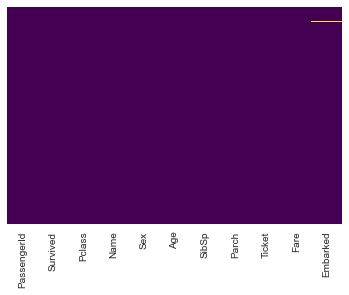

In [87]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [88]:
train.drop("Cabin",axis = 1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [93]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [94]:
Embarked = pd.get_dummies(train["Embarked"],drop_first=True)
Sex = pd.get_dummies(train["Sex"],drop_first=True)

In [95]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [96]:
train = pd.concat([train,Sex,Embarked],axis = 1)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building Logistic Regression Model

In [99]:
train.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [100]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test = train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size= 0.30,random_state = 101)

In [105]:
from sklearn.linear_model import LogisticRegression

In [107]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(x_train,y_train)  

LogisticRegression(solver='liblinear')

In [108]:
pred = logmodel.predict(x_test)

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
accuracy = confusion_matrix(y_test,pred)

In [111]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
acc = accuracy_score(y_test,pred)
acc

0.7761194029850746

In [114]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)